In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
df = pd.read_csv("data_1.1.csv").to_numpy()
# print(df[:5])
# x = df[:,0]
# y = df[:,-1]
df = np.hstack((np.ones((df.shape[0],1)), df))
x = df[:,:-1]
y = df[:,-1].reshape(-1,1)
# data = np.column_stack((x,y))

In [4]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 500 random values for X (independent variable) between 0 and 10
X = 10 * np.random.rand(500, 1)

# Define the true linear relationship: y = 5 + 2.5 * X + noise
true_slope = 2.5
true_intercept = 5
noise = np.random.randn(500, 1)  # Add some noise for realism

# Generate the dependent variable y
y = true_intercept + true_slope * X + noise

# Combine X and y into a DataFrame
dataset = pd.DataFrame(np.c_[X, y], columns=['X', 'y'])
dataset = dataset.to_numpy()
# Show the first few rows of the dataset
dataset = np.hstack((np.ones((dataset.shape[0],1)), dataset))

x_gen = dataset[:,:-1]
y_gen = dataset[:,-1].reshape(-1,1)
# Save to a CSV file if needed
# dataset.to_csv("linear_regression_dataset.csv", index=False)


In [5]:
print(x_gen.shape)
print(y_gen.shape)

(500, 2)
(500, 1)


In [7]:
# theta, error_list = gradientDescent(x_gen,y_gen)

In [8]:
# import matplotlib.pyplot as plt
# plt.plot(error_list)
# plt.xlim([0,])


`Modify formula`

In [9]:
# df = pd.read_csv("data_1.1.csv").to_numpy()
# # print(df[:5])
# x = df[:,0]
# y = df[:,-1]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
 
# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)

# print(data)
# visualising data
# plt.scatter(data[:500, 0], data[:500, 1], marker='.')
# plt.show()
 
# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))
# print(data)
 
split_factor = 0.90
split = int(split_factor * data.shape[0])
 
X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))
 


In [17]:
def hypothesis(a,x,b,c):
    return np.sqrt(x)*a + b*x + c

def cost_function(y,a,x,b,c):
    h = hypothesis(a,x,b,c)
    cost = (h - y)**2
    return cost.mean()

def gradient_a(y,a,x,b,c):
    h = hypothesis(a,x,b,c)
    grada = (h - y)*np.sqrt(x)
    return 2*np.mean(grada)

def gradient_b(y,a,x,b,c):
    h = hypothesis(a,x,b,c)
    gradb = (h-y)*x
    return 2*np.mean(gradb)

def gradient_c(y,a,x,b,c):
    h = hypothesis(a,x,b,c)
    gradc = (h-y)
    return 2*np.mean(gradc)



In [18]:
def create_mini_batch(x,y,batch_size):
    mini_batches = []
    df = np.hstack((x,y))
    np.random.shuffle(df)
    n_mini_batch = len(df) // batch_size #(we want to get only int not flot number)
    i = 0
    for i in range(n_mini_batch + 1):
        mini_batch = df[i*batch_size:(i+1)*batch_size,:]
        x_mini = mini_batch[:,:-1]
        y_mini = mini_batch[:,-1]
        mini_batches.append((x_mini,y_mini))
    if df.shape[0] % batch_size != 0:
        mini_batch = df[i*batch_size:df.shape[0]] 
        x_mini = mini_batch[:,:-1]
        y_mini = mini_batch[:,-1].reshape((-1,1))
        mini_batches.append((x_mini,y_mini))
    return mini_batches

In [19]:
def gradienDescent(x,y,lr = 0.001, batc_s = 50):
    a,b,c = 0,0,0
    error_list = []
    max_iter = 5
    for itr in range(max_iter):
        miniBatches =  create_mini_batch(x,y,batc_s)
        for mini in miniBatches:
            x_mini,y_mini = mini
            a = a - lr*gradient_a(y_mini,a,x_mini,b,c)
            b = b - lr*gradient_b(y_mini,a,x_mini,b,c)
            c = c - lr*gradient_c(y_mini,a,x_mini,b,c)
            error_list.append(cost_function(y_mini,a,x_mini,b,c))
        
    return a,b,c, error_list
            

In [20]:
list = create_mini_batch(x_gen,y_gen,10)
len(list)

51

In [21]:
a,b,c, error_list1 = gradienDescent(x_gen,y_gen)

ValueError: operands could not be broadcast together with shapes (50,2) (50,) 

In [22]:
import matplotlib.pyplot as plt

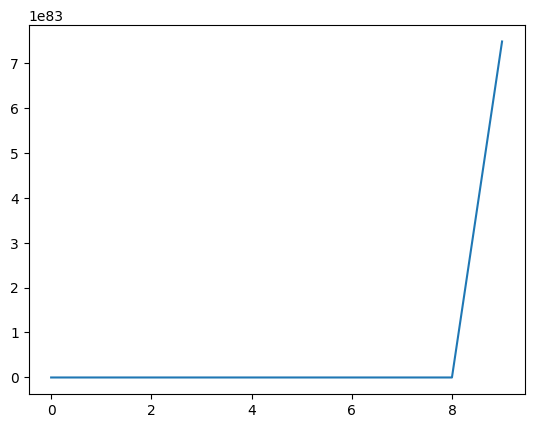

In [400]:
plt.plot(error_list1)